In [ ]:
# 1.📦 Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (10, 8)

In [37]:
# 2.📂 Cargar el dataset de características
data_path = f"F:/orthesis_classification/data/features/emg_features_labeled.csv"
try:
    features = pd.read_csv(data_path)
except FileNotFoundError:
    print("Archivo no encontrado. Por favor, verifique la ruta de acceso.")
    exit()

In [38]:
# 3.🔢 Explorar estructura y estadísticas de los datos. Buscar valores nulos, ceros y NaN.
def data_structure(df):
    print(f"\n📋 Estructura del dataset: ")
    df.info()
    print("\n🔢 Tipos de datos del dataset:\n", df.dtypes)

def data_stats(df):
    print(f"\n📊 Estadísticas descriptivas del dataset: ")
    print(df.describe())

def missing_values(df):
    print(f"\n❓ Valores nulos por columna en dataset: ")
    print(df.isnull().sum())
    print(f"\n❓ Valores NaN por columna en dataset: ")
    print(df.isna().sum())
    print(f"\n❓ Valores con ceros por columna en dataset: ")
    print(df.isin([0]).sum())
    
data_structure(features)
data_stats(features)
missing_values(features)


📋 Estructura del dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   iem        1848 non-null   float64
 1   mean       1848 non-null   float64
 2   mav        1848 non-null   float64
 3   mavs       1848 non-null   float64
 4   rms        1848 non-null   float64
 5   var        1848 non-null   float64
 6   std        1848 non-null   float64
 7   kurtosis   1848 non-null   float64
 8   skewness   1848 non-null   float64
 9   max        1848 non-null   float64
 10  min        1848 non-null   float64
 11  range      1848 non-null   float64
 12  wl         1848 non-null   float64
 13  wamp       1848 non-null   float64
 14  zc         1848 non-null   float64
 15  myopulse   1848 non-null   float64
 16  wamp_norm  1848 non-null   float64
 17  ld         1848 non-null   float64
 18  aac        1848 non-null   float64
 19  dasdv      1848 non-

In [39]:
# 4.🗑️ Limpiar los datos (eliminar columnas con valores de cero)
features = features.drop(columns=["wamp", "zc", "wamp_norm"])

In [40]:
features.columns

Index(['iem', 'mean', 'mav', 'mavs', 'rms', 'var', 'std', 'kurtosis',
       'skewness', 'max', 'min', 'range', 'wl', 'myopulse', 'ld', 'aac',
       'dasdv', 'ssi', 'label'],
      dtype='object')

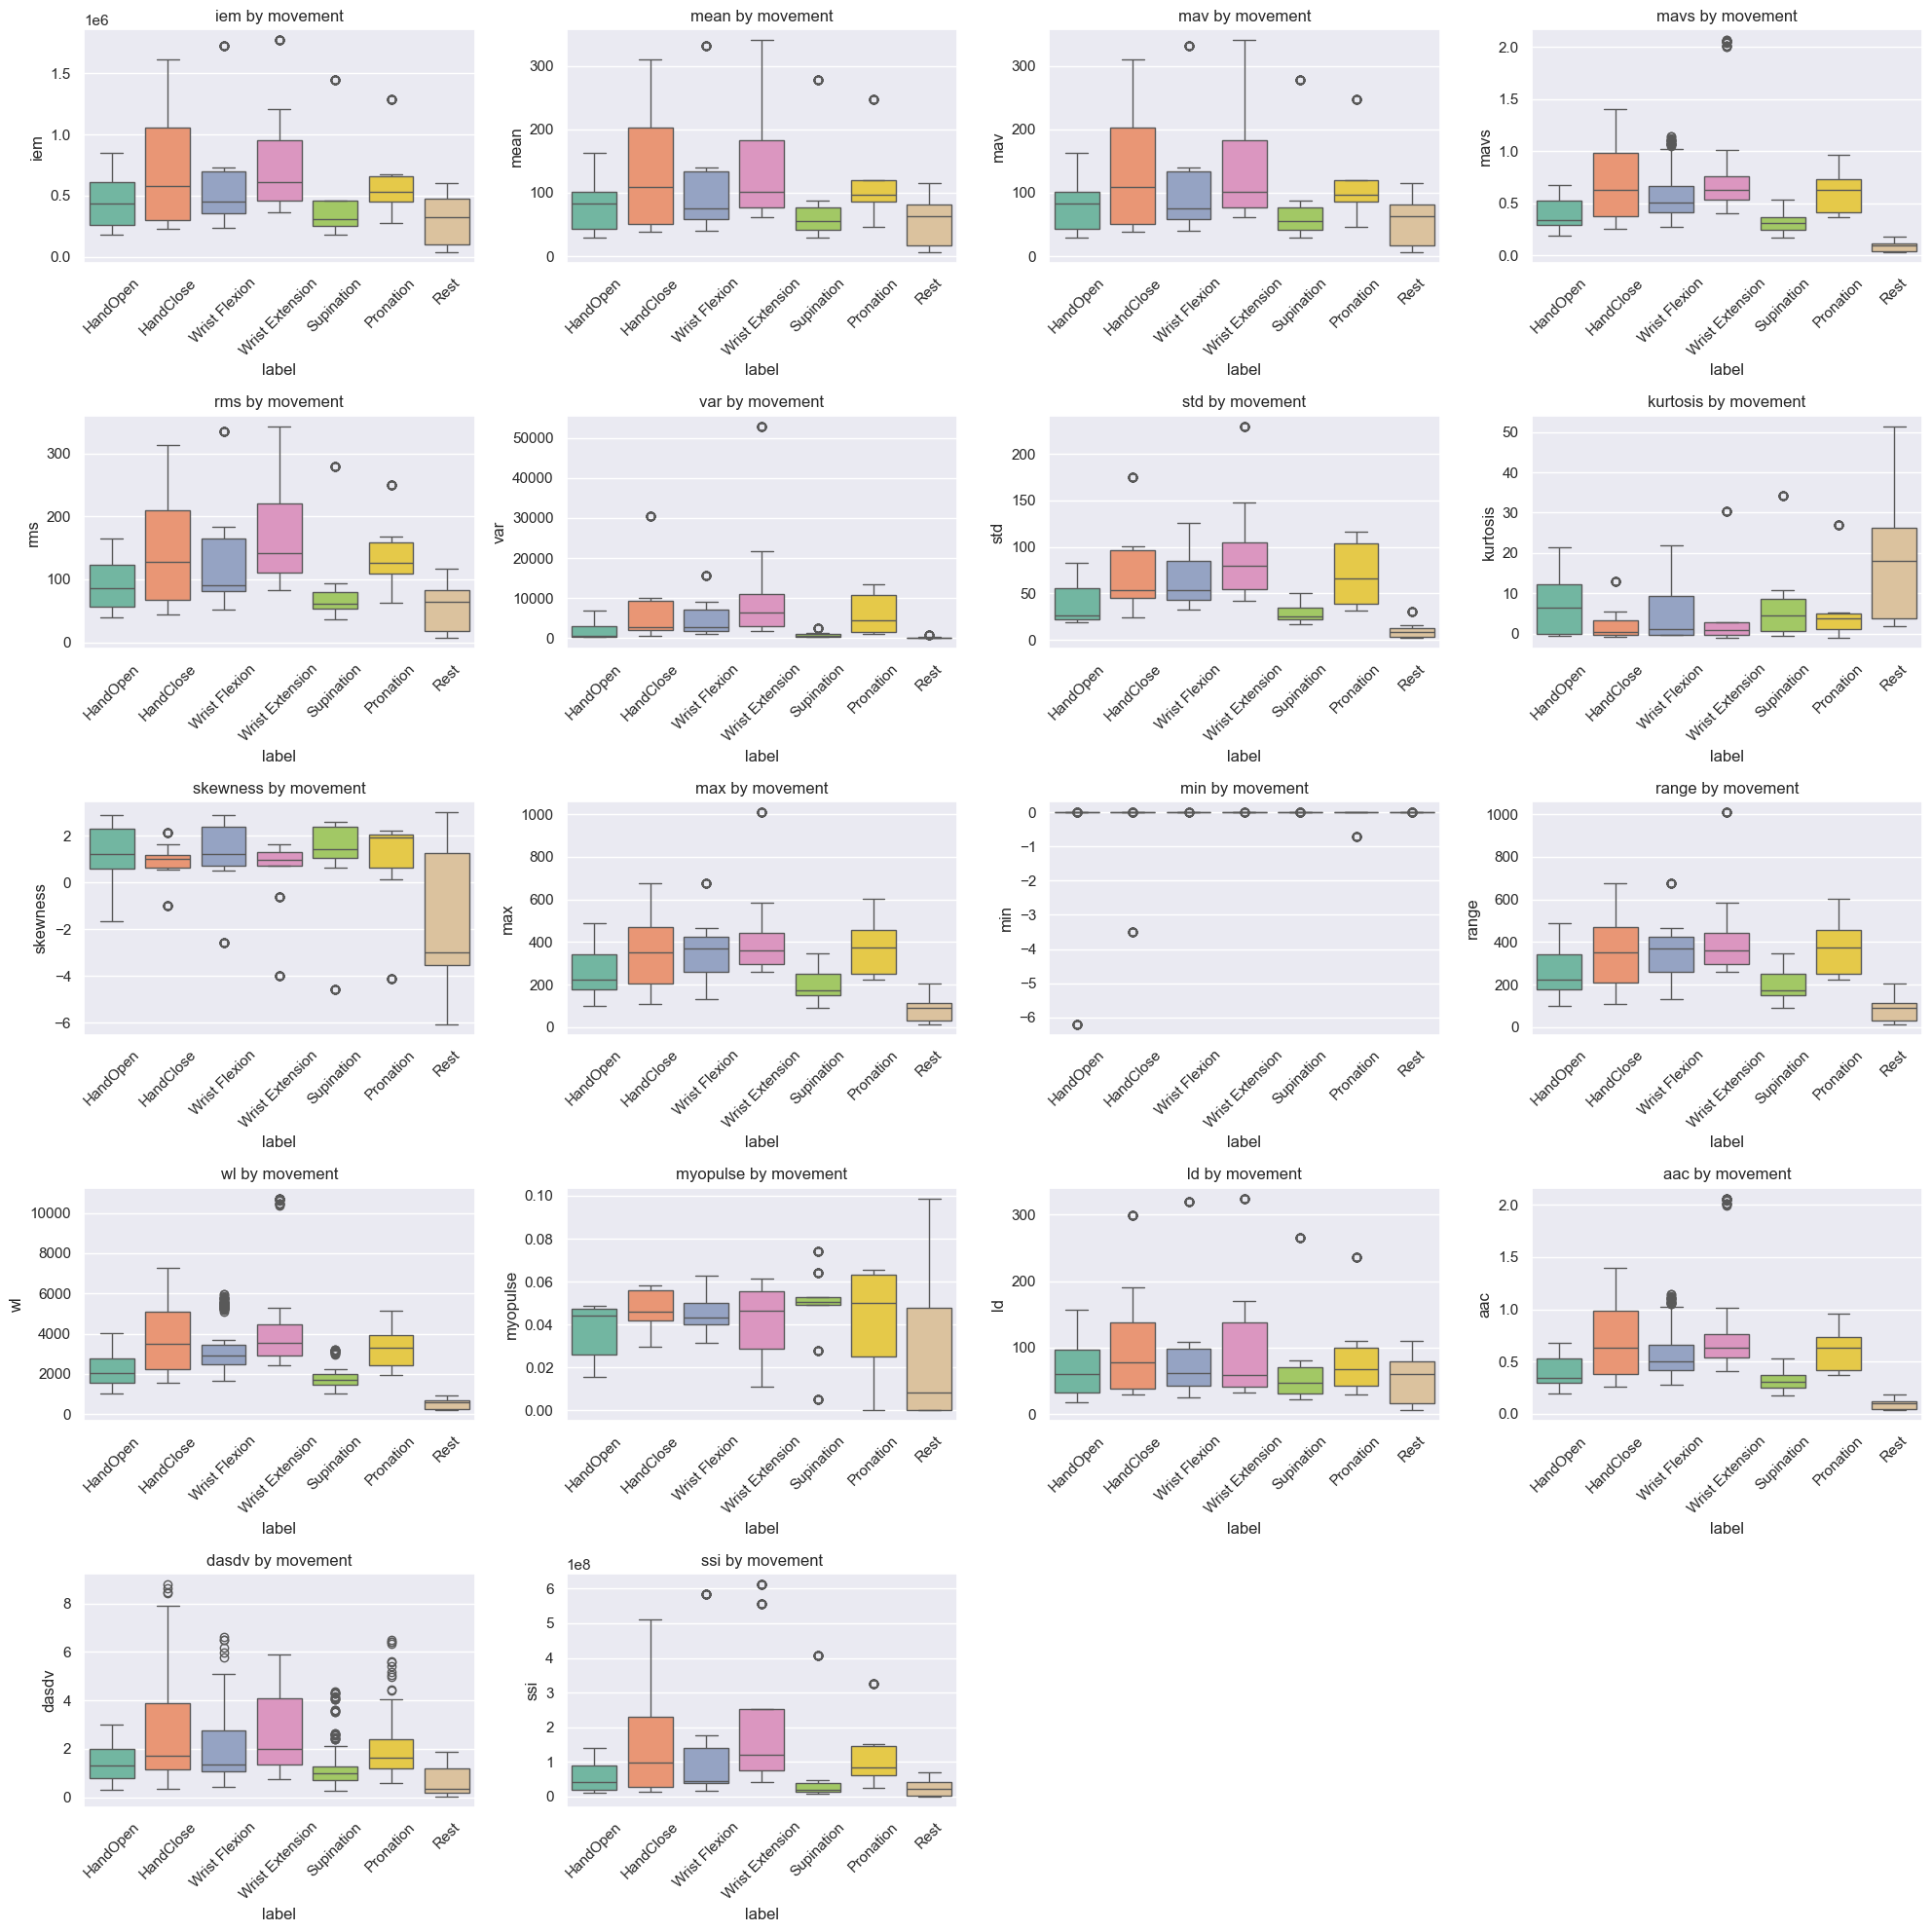

In [41]:
# 5.📈 Visualizar las características de las señales con boxplot
columns = ['iem', 'mean', 'mav', 'mavs', 'rms', 'var', 'std', 'kurtosis', 'skewness', 'max', 'min', 'range', 'wl', 'myopulse', 'ld', 'aac', 'dasdv', 'ssi']
fig, ax = plt.subplots(ncols=4, nrows=5, figsize=(20, 20))

def boxplot_features_by_movement(features):
    for i, feature in enumerate(columns):
        row, col = divmod(i, 4)
        sns.boxplot(data=features, x="label", y=feature, hue="label", palette="Set2", ax=ax[row, col])
        ax[row, col].set_title(f"{feature} by movement")
        ax[row, col].tick_params(axis="x", labelrotation=45)

    for i in range(len(columns), 20):
        row, col = divmod(i, 4)
        ax[row, col].set_visible(False)
        
    plt.tight_layout()
    plt.show()
    
boxplot_features_by_movement(features)

La distribución de las etiquetas es: label
HandOpen           264
HandClose          264
Wrist Flexion      264
Wrist Extension    264
Supination         264
Pronation          264
Rest               264
Name: count, dtype: int64


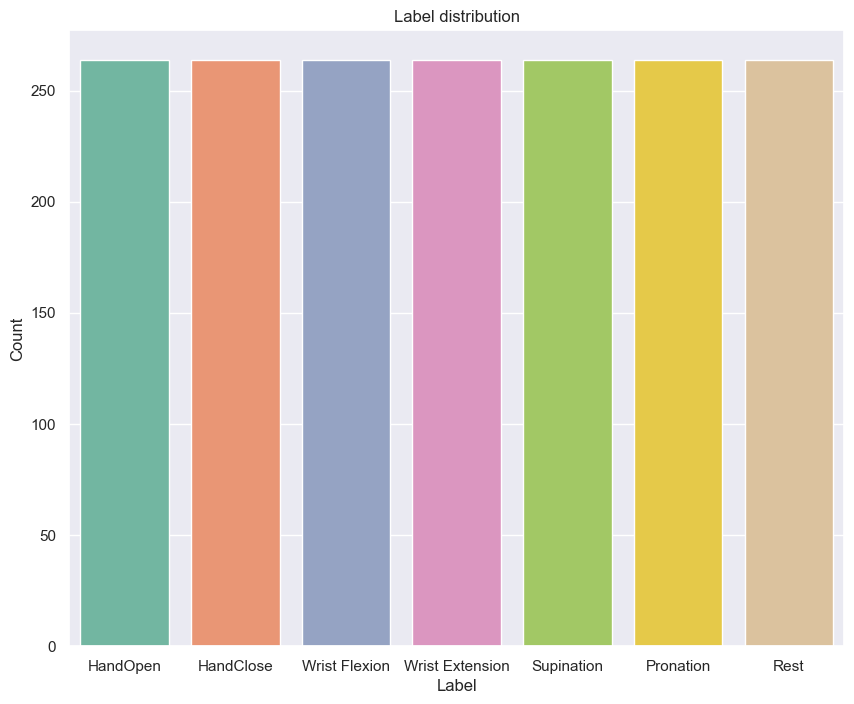

In [42]:
# 6.⚖️ Asegurar que el dataset se encuentra balanceado
label_counts = features['label'].value_counts()

def plot_label_distribution():
    print(f"La distribución de las etiquetas es: {label_counts}")
    sns.countplot(x="label", data=features, palette="Set2", hue="label")
    plt.title("Label distribution")
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.show()
    
plot_label_distribution()

Al encontrar que los valores de cada movimiento son iguales, se puede decir que el **dataset** se encuentra **balanceado**.

In [53]:
"""explained_var_acum = pca_model.explained_variance_ratio_.cumsum()

print("Porcentaje de varianza explicada acumulada")
print(explained_var_acum)

ax = sns.barplot(x=np.arange(len(explained_var_acum)) + 1, y=explained_var_acum, hue=np.arange(len(explained_var_acum)) + 1)
for cont in ax.containers:
    plt.bar_label(cont, fmt='%.2f')
plt.xlabel("Principal Component"), plt.ylabel("Per. cumulative variance explained")
plt.title("Percentage of cumulative explained variation")
plt.show()"""

'explained_var_acum = pca_model.explained_variance_ratio_.cumsum()\n\nprint("Porcentaje de varianza explicada acumulada")\nprint(explained_var_acum)\n\nax = sns.barplot(x=np.arange(len(explained_var_acum)) + 1, y=explained_var_acum, hue=np.arange(len(explained_var_acum)) + 1)\nfor cont in ax.containers:\n    plt.bar_label(cont, fmt=\'%.2f\')\nplt.xlabel("Principal Component"), plt.ylabel("Per. cumulative variance explained")\nplt.title("Percentage of cumulative explained variation")\nplt.show()'

In [64]:
"""# Porcentaje de varianza explicada acumulada 
explained_var_acum = lda_model.explained_variance_ratio_.cumsum()

print("Porcentaje de varianza explicada acumulada")
print(explained_var_acum)

ax = sns.barplot(x=np.arange(len(explained_var_acum)) + 1, y=explained_var_acum, hue=np.arange(len(explained_var_acum)) + 1)
for cont in ax.containers:
    plt.bar_label(cont, fmt='%.2f')
plt.xlabel("Principal Component"), plt.ylabel("Per. cumulative variance explained")
plt.title("Percentage of cumulative explained variation")
plt.show()"""

'# Porcentaje de varianza explicada acumulada \nexplained_var_acum = lda_model.explained_variance_ratio_.cumsum()\n\nprint("Porcentaje de varianza explicada acumulada")\nprint(explained_var_acum)\n\nax = sns.barplot(x=np.arange(len(explained_var_acum)) + 1, y=explained_var_acum, hue=np.arange(len(explained_var_acum)) + 1)\nfor cont in ax.containers:\n    plt.bar_label(cont, fmt=\'%.2f\')\nplt.xlabel("Principal Component"), plt.ylabel("Per. cumulative variance explained")\nplt.title("Percentage of cumulative explained variation")\nplt.show()'